# Análisis de Componentes Principales



## Análisis de nutrientes de las pizzas

El conjunto de datos `Pizza.csv` contiene mediciones que capturan los aspectos que hacen que una pizza sea sabrosa. ¿Puedes determinar cuál marca de pizza funciona mejor para ti y explicar por qué?

### Descripción del Conjunto de Datos

El conjunto de datos contiene las siguientes variables:

- **brand**: Marca de la pizza (etiqueta de clase)
- **id**: Muestra analizada
- **mois**: Cantidad de agua por 100 gramos en la muestra
- **prot**: Cantidad de proteína por 100 gramos en la muestra
- **fat**: Cantidad de grasa por 100 gramos en la muestra
- **ash**: Cantidad de ceniza por 100 gramos en la muestra
- **sodium**: Cantidad de sodio por 100 gramos en la muestra
- **carb**: Cantidad de carbohidratos por 100 gramos en la muestra
- **cal**: Cantidad de calorías por 100 gramos en la muestra


----
----


###            Ingesta y limpieza de datos

---



---

In [ ]:
# 1 . IMPORTAR LAS LIBRERIAS

import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 2. CARGAR LOS DATOS EN EL DATAFRAME
df = pd.read_csv('/content/drive/MyDrive/DATA Unab/Pizza.csv')
df

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...,...
295,J,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76


- **brand**: Marca de la pizza (etiqueta de clase)
- **id**: Muestra analizada
- **mois**: Cantidad de agua por 100 gramos en la muestra
- **prot**: Cantidad de proteína por 100 gramos en la muestra
- **fat**: Cantidad de grasa por 100 gramos en la muestra
- **ash**: Cantidad de ceniza por 100 gramos en la muestra
- **sodium**: Cantidad de sodio por 100 gramos en la muestra
- **carb**: Cantidad de carbohidratos por 100 gramos en la muestra
- **cal**: Cantidad de calorías por 100 gramos en la muestra

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   brand   300 non-null    object 
 1   id      300 non-null    int64  
 2   mois    300 non-null    float64
 3   prot    300 non-null    float64
 4   fat     300 non-null    float64
 5   ash     300 non-null    float64
 6   sodium  300 non-null    float64
 7   carb    300 non-null    float64
 8   cal     300 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 21.2+ KB


In [ ]:
# Las 5 primeras filas
df.head()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


In [ ]:
# Las ultimas 5 filas exploracion
df.tail()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
295,J,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76
299,J,14045,46.84,9.91,15.50,2.27,0.57,25.48,2.81


In [ ]:
# 3. REVISAR LOS TIPOS DE DATOS
df.dtypes

,0
brand,object
id,int64
mois,float64
prot,float64
fat,float64
ash,float64
sodium,float64
carb,float64
cal,float64


In [ ]:
# 4. Eliminar los duplicados
print(f'Original: {df.id.count()} filas') #conteo de duplicados
duplicate_rows_df =df[df.duplicated()] # genero un set de datos con todos los datos que hay duplicados
print(f'Cantidad de filas duplicadas: {duplicate_rows_df.id.count()}')  #deteco que el ID esta repetido en 18 casos

# Eliminar los duplicados
df = df.drop_duplicates()

Original: 300 filas
Cantidad de filas duplicadas: 5


In [ ]:
#Conteo Filas despues de eliminar los duplicados
print(f'Original: {df.id.count()} filas')

Original: 295 filas


In [ ]:
# 5 ELIMINAR LAS COLUMNAS IRRELEVANTES  limpieza set de datos
print(df.columns)
df = df.drop(['id'], axis=1) # elemino la columna ID

Index(['brand', 'id', 'mois', 'prot', 'fat', 'ash', 'sodium', 'carb', 'cal'], dtype='object')


In [ ]:
# 6. RENOMBRAR LAS COLUMNAS
df = df .rename(columns = {
    'brand':'Marca',
    'mois': 'Humedad',
    'prot': 'Proteína',
    'fat': 'Grasa',
    'ash': 'Ceniza',
    'sodium': 'Sodio',
    'carb': 'Carbohidratos',
    'cal': 'Calorías'})

df.columns

Index(['Marca', 'Humedad', 'Proteína', 'Grasa', 'Ceniza', 'Sodio',
       'Carbohidratos', 'Calorías'],
      dtype='object')

In [ ]:
# 7. ELIMINAR LOS VALORES PERDIDOS O NULOS  sin datos
#Encontrar los valores nulos
print(df.isnull().sum())

#Eliminar los valores perdidos
df = df.dropna()
print()

#Despues de eliminar los nulos
print(df.isnull().sum())

Marca            0
Humedad          0
Proteína         0
Grasa            0
Ceniza           0
Sodio            0
Carbohidratos    0
Calorías         0
dtype: int64

Marca            0
Humedad          0
Proteína         0
Grasa            0
Ceniza           0
Sodio            0
Carbohidratos    0
Calorías         0
dtype: int64


In [ ]:
df

,Marca,Humedad,Proteína,Grasa,Ceniza,Sodio,Carbohidratos,Calorías
0,A,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
293,J,46.34,10.00,17.73,2.32,0.59,23.61,2.94
294,J,44.07,10.96,18.39,2.56,0.66,24.02,3.05
295,J,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,43.15,11.79,18.46,2.43,0.67,24.17,3.10


In [ ]:
# Guardar el DataFrame limpio en un archivo CSV
df.to_csv('Pizza_pca.csv', index=False)

----
----
### Exploracion Inicial
----


In [ ]:
# Calcular la media de las columnas numéricas, excluyendo "Marca"
media = df.drop(columns=['Marca']).mean()

print('----------------------')
print('Media de cada variable')
print('----------------------')
print(media)


----------------------
Media de cada variable
----------------------
Humedad          40.900407
Proteína         13.451661
Grasa            20.309322
Ceniza            2.646576
Sodio             0.672237
Carbohidratos    22.696271
Calorías          3.274576
dtype: float64


In [ ]:
# Calcular la varianza de las columnas numéricas, excluyendo "Marca"
varianza = df.drop(columns=['Marca']).var()

print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
print(varianza)

-------------------------
Varianza de cada variable
-------------------------
Humedad           92.372116
Proteína          41.713928
Grasa             81.465919
Ceniza             1.626495
Sodio              0.138963
Carbohidratos    328.111352
Calorías           0.389151
dtype: float64


---
---
### Análisis de Componentes Principales

----


In [ ]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [ ]:
# Preparar los datos (eliminar columna no numérica 'Marca')
features = df.drop(columns=['Marca'])


In [ ]:
# Escalar los datos
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
# Aplicar PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_features)

In [ ]:
# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

In [ ]:
# Añadir la columna 'Marca' al DataFrame de PCA
pca_df = pd.concat([pca_df, df['Marca']], axis=1)


### Interpretación PC1 PC2 PC3 PC4 PC5 PC6 PC7

In [ ]:
# Crear un DataFrame con las cargas de cada variable en cada componente principal
cargas_df = pd.DataFrame(
    data    = pca.components_,
    columns = features.columns,
    index   = [f'PC{i+1}' for i in range(pca.n_components_)]
)

# Mostrar las cargas de las variables
print("Cargas de las variables en cada componente principal:")
print(cargas_df)

Cargas de las variables en cada componente principal:
      Humedad  Proteína     Grasa    Ceniza     Sodio  Carbohidratos  Calorías
PC1  0.064406  0.378109  0.446930  0.472075  0.435819      -0.424789  0.244747
PC2  0.627678  0.271247 -0.234249  0.110901 -0.202405      -0.320875 -0.566873
PC3 -0.422667  0.745956 -0.198954  0.056503 -0.454143       0.053241  0.114219
PC4 -0.219874 -0.013251 -0.505931  0.556525  0.442731       0.334395 -0.279218
PC5 -0.005140 -0.387837  0.176038  0.667348 -0.605662       0.005406  0.079738
PC6  0.446391 -0.000131 -0.525392  0.058696  0.003307      -0.000617  0.721970
PC7  0.419032  0.276433  0.377897  0.055990 -0.000525       0.775828  0.012082


* PC1 parece estar fuertemente influenciada por Humedad, Grasa, Ceniza, y Sodio en una dirección positiva, mientras que Carbohidratos tiene una influencia negativa.
* PC2 está fuertemente influenciada por Humedad en una dirección negativa y Calorías en una dirección positiva, con contribuciones más pequeñas de otras variables.

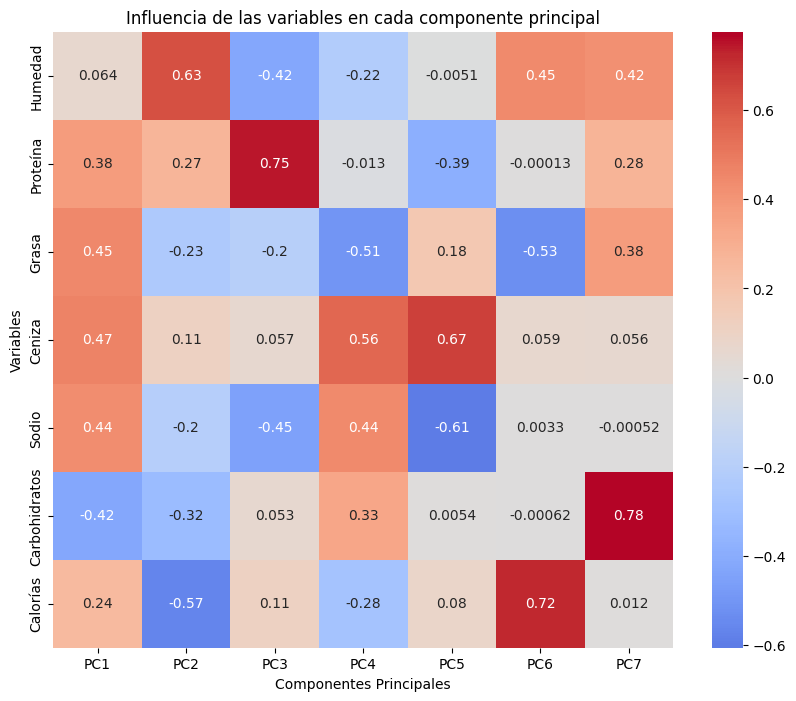

In [ ]:
cargas_df_transposed = cargas_df.transpose()

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cargas_df_transposed, annot=True, cmap='coolwarm', center=0)
plt.title('Influencia de las variables en cada componente principal')
plt.ylabel('Variables')  # Ahora las variables van en el eje y
plt.xlabel('Componentes Principales')  # Ahora los componentes principales van en el eje x
plt.show()

#### Componente Principal 1 (PC1)
* Humedad: Tiene una influencia negativa moderada (color azul claro), lo que significa que a medida que aumenta la humedad, el valor de PC1 tiende a disminuir.
* Proteína: Influencia positiva fuerte (color rojo oscuro), indicando que un aumento en la proteína incrementa significativamente el valor de PC1.
* Grasa: Influencia positiva moderada (color rojo claro), sugiriendo que más grasa también aumenta el valor de PC1.
* Ceniza: Influencia negativa leve (color azul claro), lo que implica una ligera disminución en PC1 con más ceniza.
* Sodio: Influencia positiva moderada (color rojo claro), indicando que más sodio incrementa PC1.
* Carbohidratos: Influencia negativa fuerte (color azul oscuro), lo que significa que más carbohidratos disminuyen significativamente PC1.
* Calorías: Influencia positiva moderada (color rojo claro), sugiriendo que más calorías aumentan PC1.
----
#### Componente Principal 2 (PC2)
* Humedad: Influencia positiva leve (color rojo claro), indicando que más humedad aumenta ligeramente PC2.
* Proteína: Influencia negativa leve (color azul claro), sugiriendo que más proteína disminuye ligeramente PC2.
* Grasa: Influencia negativa moderada (color azul claro), lo que implica que más grasa disminuye PC2.
* Ceniza: Influencia positiva fuerte (color rojo oscuro), indicando que más ceniza incrementa significativamente PC2.
* Sodio: Influencia negativa leve (color azul claro), sugiriendo que más sodio disminuye ligeramente PC2.
* Carbohidratos: Influencia positiva leve (color rojo claro), indicando que más carbohidratos aumentan ligeramente PC2.
* Calorías: Influencia negativa leve (color azul claro), sugiriendo que más calorías disminuyen ligeramente PC2.
----

* PC1 parece estar fuertemente influenciado por la proteína y los carbohidratos, con la proteína aumentando y los carbohidratos disminuyendo su valor.
* PC2 está fuertemente influenciado por la ceniza, con un aumento en la ceniza incrementando significativamente su valor.

----
#### Gráfico de porcentaje de varianza explicada por cada componente:

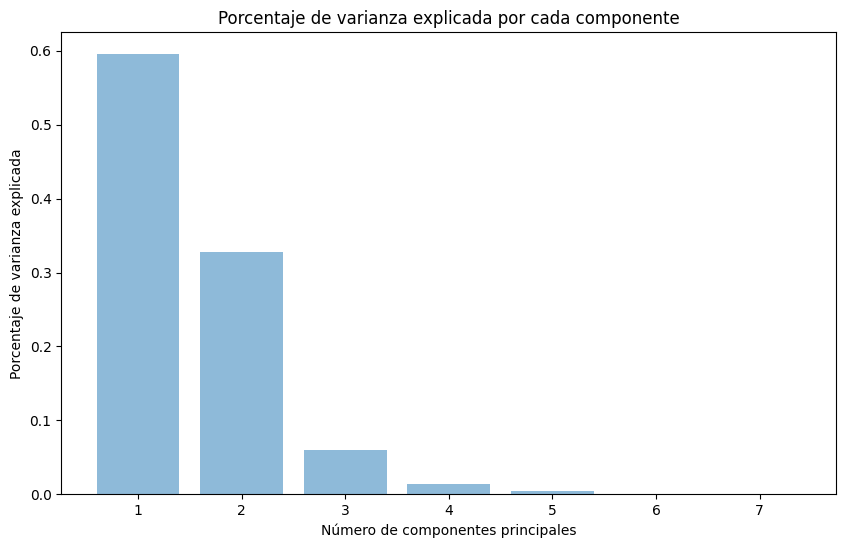

In [ ]:
plt.figure(figsize=(10, 6))

plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.xlabel('Número de componentes principales')
plt.ylabel('Porcentaje de varianza explicada')
plt.title('Porcentaje de varianza explicada por cada componente')
plt.show()




* Primer Componente: Explica un poco más del 50% de la varianza total.
* Segundo Componente: Explica un poco menos del 30% de la varianza.
* Componentes Restantes: Explican una cantidad significativamente menor de la varianza.
#### Esto indica que los dos primeros componentes principales capturan la mayor parte de la variabilidad en los datos, lo que sugiere que se puede reducir la dimensionalidad del conjunto de datos a estos dos componentes sin perder mucha información.

----
#### Gráfico de porcentaje de varianza explicada acumulada:

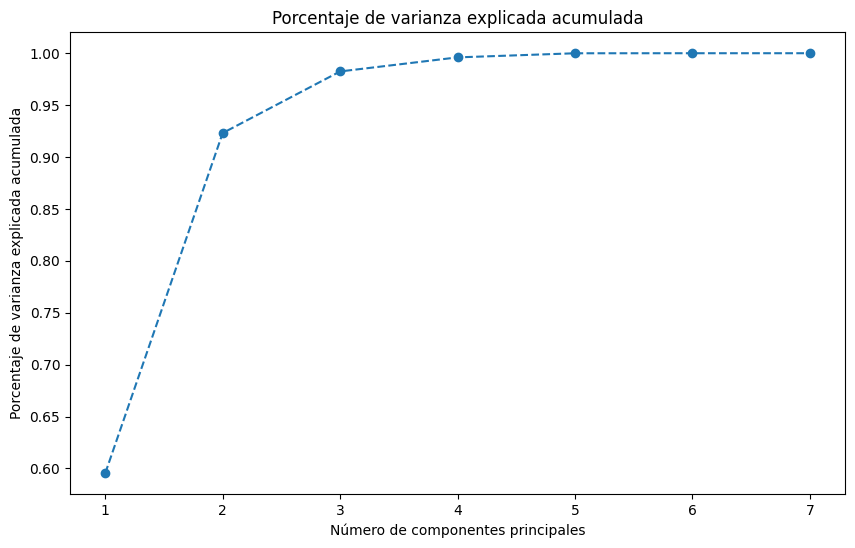

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Número de componentes principales')
plt.ylabel('Porcentaje de varianza explicada acumulada')
plt.title('Porcentaje de varianza explicada acumulada')
plt.show()


* La línea comienza en la esquina inferior izquierda y sube rápidamente hasta el segundo componente principal, después de lo cual el aumento se vuelve más gradual.
* Alrededor del tercer componente principal, la varianza explicada acumulada se acerca a 1, lo que indica que los primeros dos componentes principales explican casi toda la variabilidad en los datos.
Esto sugiere que se pueden utilizar los primeros 2 componentes principales para capturar la mayor parte de la información en el conjunto de datos, reduciendo así la dimensionalidad sin perder mucha información.

----
#### Diagrama de dispersión de las dos primeras componentes principales:

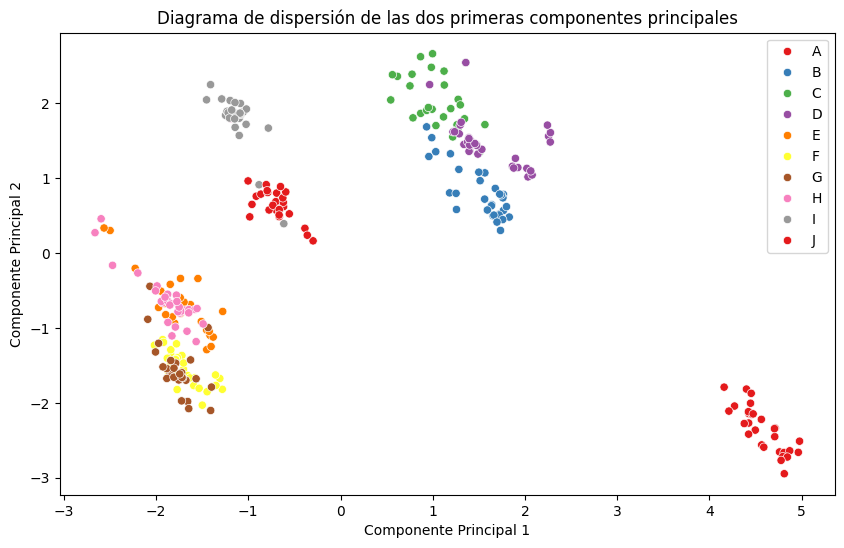

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Marca', palette='Set1')
plt.title('Diagrama de dispersión de las dos primeras componentes principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()


----
#### Biplot de los componentes principales:

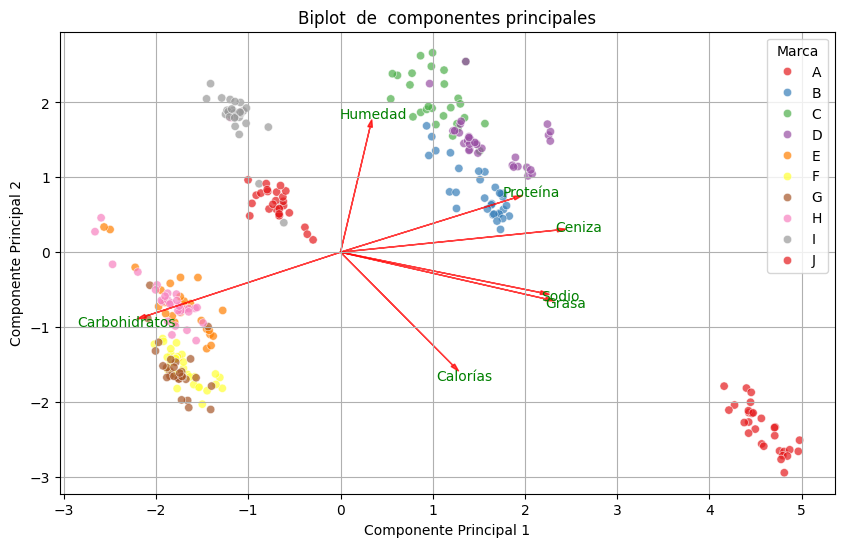

In [ ]:

plt.figure(figsize=(10, 6))

# Diagrama de dispersión de las componentes principales
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['Marca'], palette='Set1', alpha=0.7)

# Añadir vectores y etiquetas para cada característica original
for i, (pc1, pc2) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, pc1 * max(principal_components[:, 0]), pc2 * max(principal_components[:, 1]),
              color='r', alpha=0.75, head_width=0.05, head_length=0.1)
    plt.text(pc1 * max(principal_components[:, 0]) * 1.1, pc2 * max(principal_components[:, 1]) * 1.1,
             features.columns[i], color='g', ha='center', va='center')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Biplot  de  componentes principales')
plt.grid()


plt.show()